In [2]:
import pandas as pd

path="../../experiments/FashionMNIST/ZW/result_PI_L_ZW.csv"
df_result=pd.read_csv(path)
df_result["ratio"]=(2*df_result["n"]+1)/df_result["L"]
print(df_result.sort_values(["eps","L","ratio"]))

    eps   n    L  Train Acc  Test Acc  Test_noise Acc     ratio
2     0   1   16   0.947900  0.860700        0.860700  0.187500
3     0   3   16   0.953800  0.877300        0.877300  0.437500
5     0   1   32   0.964600  0.840100        0.840100  0.093750
1     0   3   32   0.975600  0.871800        0.871800  0.218750
7     0   5   32   0.970424  0.881143        0.881143  0.343750
0     0   7   32   0.973000  0.891400        0.891400  0.468750
6     0   2   64   0.980500  0.856400        0.856400  0.078125
10    0   5   64   0.986500  0.867900        0.867900  0.171875
8     0  10   64   0.979732  0.882643        0.882643  0.328125
4     0  15   64   0.985600  0.876400        0.876400  0.484375
9     0   6  256   0.992200  0.862400        0.862400  0.050781
11    1   3   16   0.831049  0.396000        0.578214  0.437500
14    1   1   32   0.897723  0.537800        0.596286  0.093750
12    1   7   32   0.966004  0.626300        0.673500  0.468750
15    1   2   64   0.944129  0.533400   

### 定義域に対する近傍の割合    

/tmp/ipykernel_2037169/3760375079.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_result_ratio=df_result_ratio[df_result["eps"]!=2]
/tmp/ipykernel_2037169/3760375079.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  groups=df_result_ratio[(df_result["L"]==L)].groupby(["eps","L"])
/tmp/ipykernel_2037169/3760375079.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  groups=df_result_ratio[(df_result["L"]==L)].groupby(["eps","L"])
/tmp/ipykernel_2037169/3760375079.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  groups=df_result_ratio[(df_result["L"]==L)].groupby(["eps","L"])
/tmp/ipykernel_2037169/3760375079.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  groups=df_result_ratio[(df_result["L"]==L)].groupby(["eps","L"])


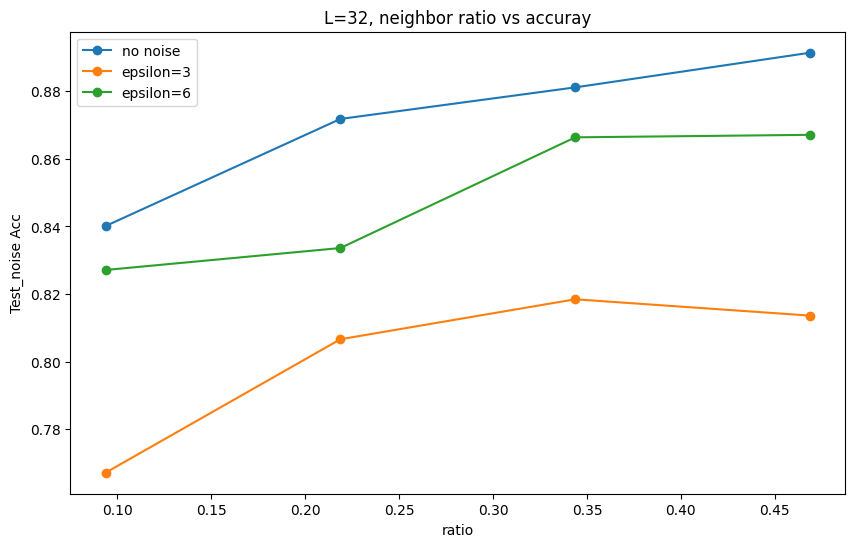

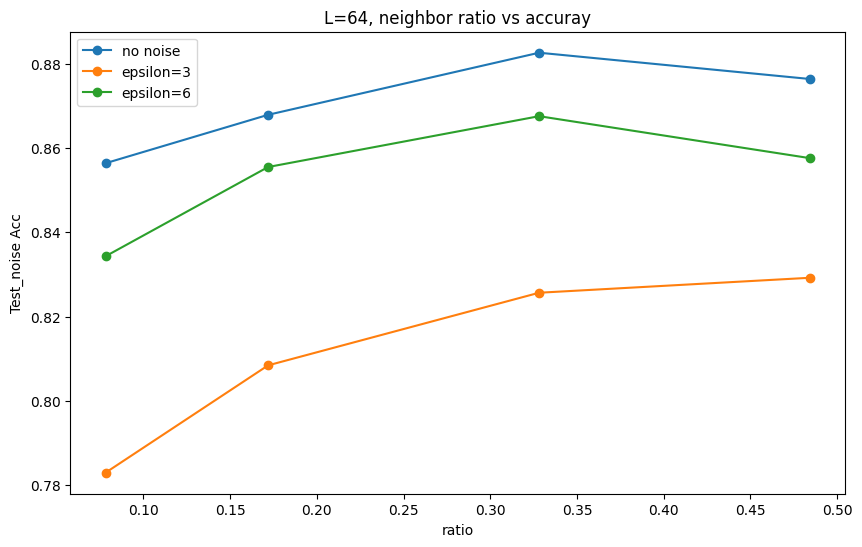

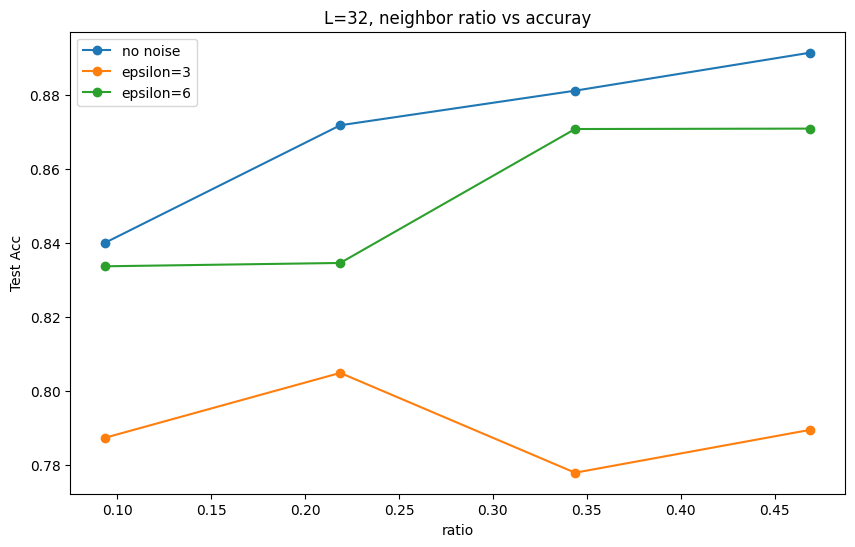

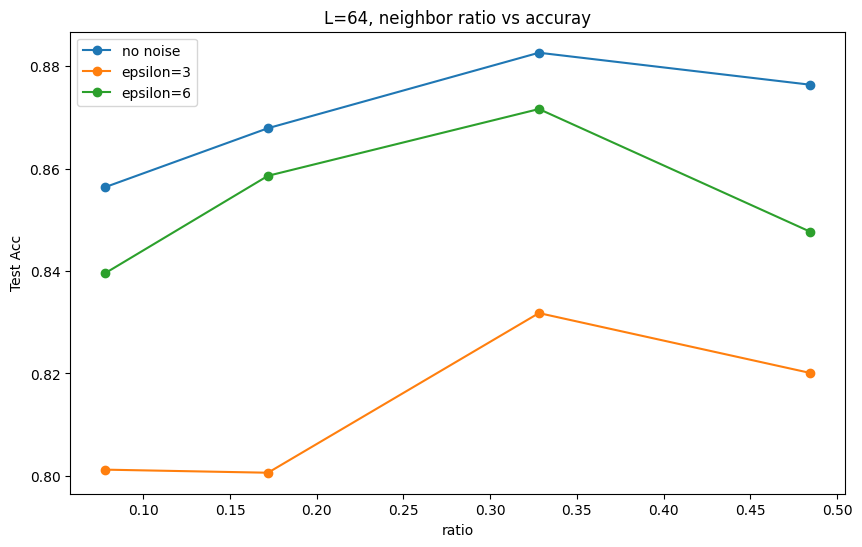

In [36]:
import matplotlib.pyplot as plt
df_result_ratio=df_result.copy()
df_result_ratio=df_result[df_result["eps"]!=1]
df_result_ratio=df_result_ratio[df_result["eps"]!=2]
for result in ["Test_noise Acc","Test Acc"]:
    for L in [32,64]:
        plt.figure(figsize=(10,6))
        groups=df_result_ratio[(df_result["L"]==L)].groupby(["eps","L"])
        for name,group in groups:
            group=group.sort_values("ratio") #割合順にする
            label_str ="no noise" if name[0] == 0 else f"epsilon={name[0]}"   
            plt.plot(group["ratio"],group[result],marker='o',label=label_str)
            plt.xlabel('ratio')
            plt.ylabel(f'{result}')
            plt.title(f"L={L}, neighbor ratio vs accuray")
            plt.legend()
        
        


### Lの値による変化

   eps  n   L  Train Acc  Test Acc  Test_noise Acc   ratio
3    0  3  16     0.9538    0.8773          0.8773  0.4375
   eps  n   L  Train Acc  Test Acc  Test_noise Acc    ratio
0    0  7  32      0.973    0.8914          0.8914  0.46875
   eps   n   L  Train Acc  Test Acc  Test_noise Acc     ratio
4    0  15  64     0.9856    0.8764          0.8764  0.484375
   eps  n   L  Train Acc  Test Acc  Test_noise Acc   ratio
3    0  3  16     0.9538    0.8773          0.8773  0.4375
   eps  n   L  Train Acc  Test Acc  Test_noise Acc    ratio
0    0  7  32      0.973    0.8914          0.8914  0.46875
   eps   n   L  Train Acc  Test Acc  Test_noise Acc     ratio
4    0  15  64     0.9856    0.8764          0.8764  0.484375


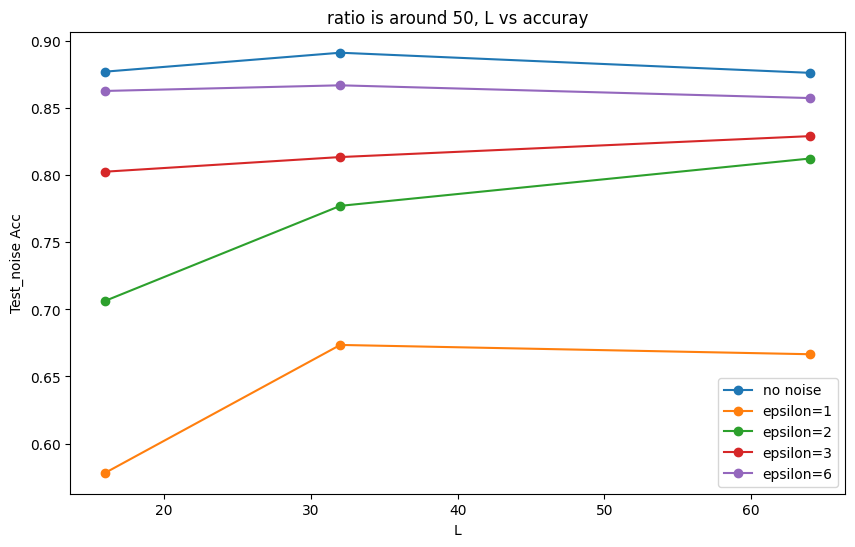

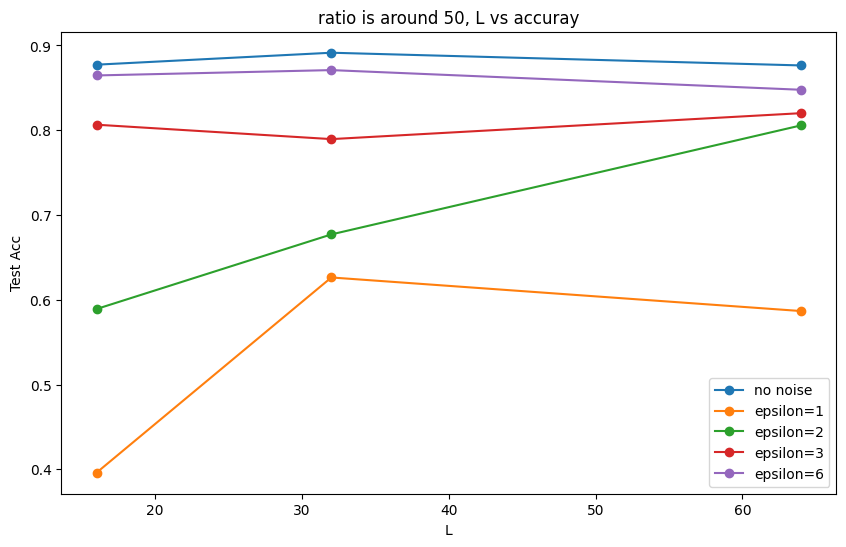

In [31]:
import matplotlib.pyplot as plt
for result in ["Test_noise Acc","Test Acc"]:
    plt.figure(figsize=(10,6))
    eps_0=[]
    eps_1=[]
    eps_2=[]
    eps_3=[]
    eps_6=[]
    discrization=[16,32,64]
    for L in discrization:
        groups=df_result[(df_result["L"]==L)].groupby(["L"])
        for name,group in groups:
            group_max=group[group["ratio"]==group["ratio"].max()]
            print(group_max[group_max["eps"]==0])
            eps_0.append(group_max[group_max["eps"]==0][result])
            eps_1.append(group_max[group_max["eps"]==1][result])
            eps_2.append(group_max[group_max["eps"]==2][result])
            eps_3.append(group_max[group_max["eps"]==3][result])
            eps_6.append(group_max[group_max["eps"]==6][result])

    plt.plot(discrization,eps_0,marker='o',label="no noise")
    plt.plot(discrization,eps_1,marker='o',label="epsilon=1")
    plt.plot(discrization,eps_2,marker='o',label="epsilon=2")
    plt.plot(discrization,eps_3,marker='o',label="epsilon=3")
    plt.plot(discrization,eps_6,marker='o',label="epsilon=6")
    plt.xlabel('L')
    plt.ylabel(f'{result}')
    plt.title(f"ratio is around 50, L vs accuray")
    plt.legend()

        
        


### UTSとTTSの学習精度の違い

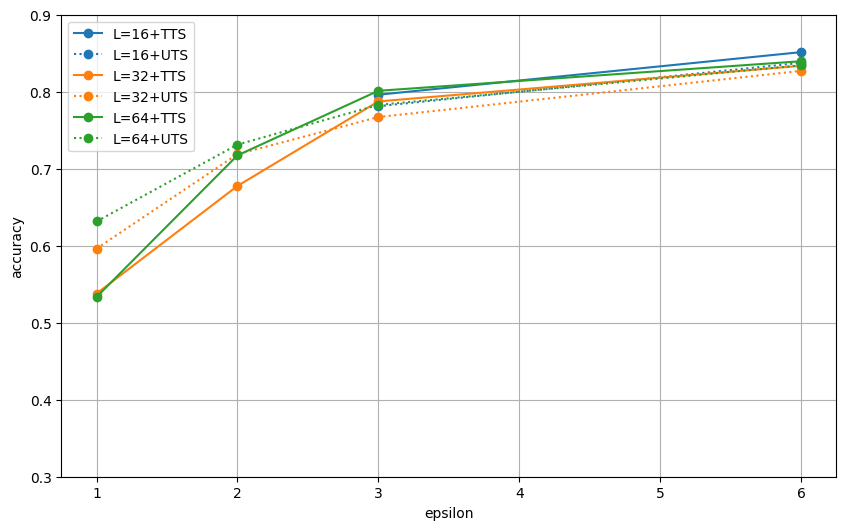

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
discrization=[16,32,64]
for L in discrization:
    groups=df_result[(df_result["L"]==L)].groupby(["L"])
    for name,group in groups:
        label_str = f"L={name[0]}"
        group_max=group[group["ratio"]==group["ratio"].min()]
        
        lines=plt.plot(group_max["eps"][1:5],group_max["Test Acc"][1:5],marker="o", label=label_str+"+TTS")
        # 2. 自動で割り当てられた色を取得
        color = lines[0].get_color()
        plt.plot(group_max["eps"][1:5],group_max["Test_noise Acc"][1:5],marker="o",linestyle=":",color=color, label=label_str+"+UTS")
        
# ラベルとタイトルの設定
plt.xlabel('epsilon')
plt.ylabel('accuracy')
plt.ylim(0.30, 0.9)
plt.legend() # 凡例を表示
plt.grid(True)
# 表示
plt.show()

### CWALDPとの比較

In [ ]:
import pandas as pd
import os

data="FashionMNIST"
CWALDP_params = [(0.5,4,10,0)]
eps_list=[1,2,3]
model="model2"
date="20260109"
all_results=[]
for unique in [False]:
    for eps in eps_list:
        for P, L, cluster_num,label_epsilon in CWALDP_params:
                filename_zw = f"../../experiments/FashionMNIST/CWALDP/CNN/{date}/{unique}_unique_RR_waldp_L{L}_PI{P}_C{cluster_num}_eps{eps}_label_noise_{label_epsilon}_{model}.csv"
                if os.path.exists(filename_zw):
                        df = pd.read_csv(filename_zw, comment="#")
                        test_accuracy_mean = df["test_accuracy"].mean()  
                        train_accuracy_mean = df["train_accuracy"].mean()  
                        test_noise_accuracy_mean = df["test_noise_accuracy"].mean()       
                        print(f"eps: {eps}, P: {P}, L: {L}, cluster_num: {cluster_num} => test_accuracy_mean: {test_accuracy_mean}, train_accuracy_mean: {train_accuracy_mean}, test_noise_accuracy_mean: {test_noise_accuracy_mean}")             
                        all_results.append({
                            "P": P,
                            "L": L,
                            "cluster_num": cluster_num,
                            "epsilon": eps,
                            "label_epsilon": label_epsilon,
                            "test_accuracy_mean": test_accuracy_mean,
                            "train_accuracy_mean": train_accuracy_mean,
                            "test_noise_accuracy_mean": test_noise_accuracy_mean
                        })
                else:
                    raise ValueError("Not find file_path")
    result_CWALDP_df=pd.DataFrame(all_results)

### ZW+24の実験結果

In [ ]:
import pandas as pd
import os
data="FashionMNIST"
ZW_params = [(32,1),(32,3),(64,3)]
eps_list=[1,2,3]
model="model1"
date="20260119"
neighbor=1
all_results=[]
for eps in eps_list:
    for  L, neighbor in ZW_params:
            filename_zw = f"../../experiments/FashionMNIST/ZW/CNN/{date}/eps{eps}_imporve_fmnist_bf_cv10_fp0.4_n{neighbor}_NOISE0_k1_PI1.0_L{L}_{model}.csv"
            if os.path.exists(filename_zw):
                    df = pd.read_csv(filename_zw, comment="#")
                    test_accuracy_mean = df["test_accuracy"].mean()  
                    train_accuracy_mean = df["train_accuracy"].mean()  
                    test_noise_accuracy_mean = df["test_noise_accuracy"].mean()     
                    time=df["time_sec"].mean()       
                    all_results.append({
                        "L": L,
                        "neighbor": neighbor,
                        "epsilon": eps,
                        "time": time,
                        "test_accuracy_mean": test_accuracy_mean,
                        "train_accuracy_mean": train_accuracy_mean,
                        "test_noise_accuracy_mean": test_noise_accuracy_mean
                    })
    result_df=pd.DataFrame(all_results)
    print(result_df.head())

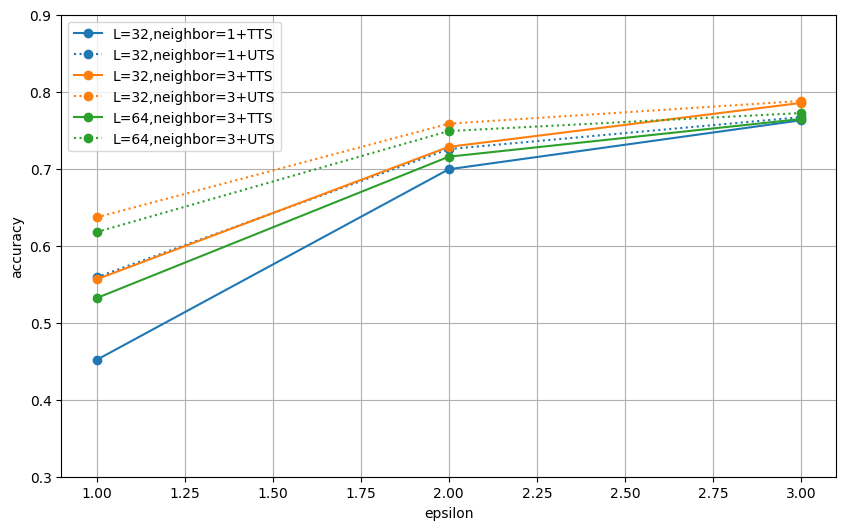

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
for L in [32,64]:
    groups=result_df[(result_df["L"]==L)].groupby(["L","neighbor"])
    for name,group in groups:
        label_str = f"L={name[0]},neighbor={name[1]}"
        lines=plt.plot(group["epsilon"][0:3],group["test_accuracy_mean"][0:3],marker="o", label=label_str+"+TTS")
        # 2. 自動で割り当てられた色を取得
        color = lines[0].get_color()
        plt.plot(group["epsilon"][0:3],group["test_noise_accuracy_mean"][0:3],marker="o",linestyle=":",color=color, label=label_str+"+UTS")
# ラベルとタイトルの設定
plt.xlabel('epsilon')
plt.ylabel('accuracy')
plt.ylim(0.30, 0.9)
plt.legend() # 凡例を表示
plt.grid(True)
# 表示
plt.show()